In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\5':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\5')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_7328\499694536.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap_external.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\codecs.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\aliases.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\__init__.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\utf_8.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\cp1252.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\io.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\stat.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\_collections_abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\genericpath.py": 1680645435

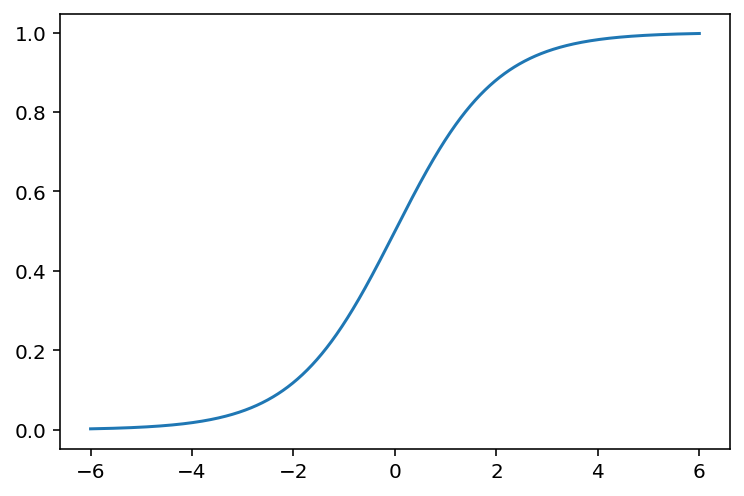

In [2]:
#| echo: false
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 1001)
y = 1/(1+np.exp(-x))
_ = plt.plot(x, y)

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', LogisticRegression())]

log_reg = Pipeline(steps=steps)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8695652173913043

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

steps = [('normalize', MinMaxScaler()),
         ('log', SGDClassifier(loss='log_loss', max_iter=100))]

sgd_clf = Pipeline(steps=steps)
sgd_clf.fit(X_train, y_train)
sgd_clf.score(X_test, y_test)

0.9565217391304348

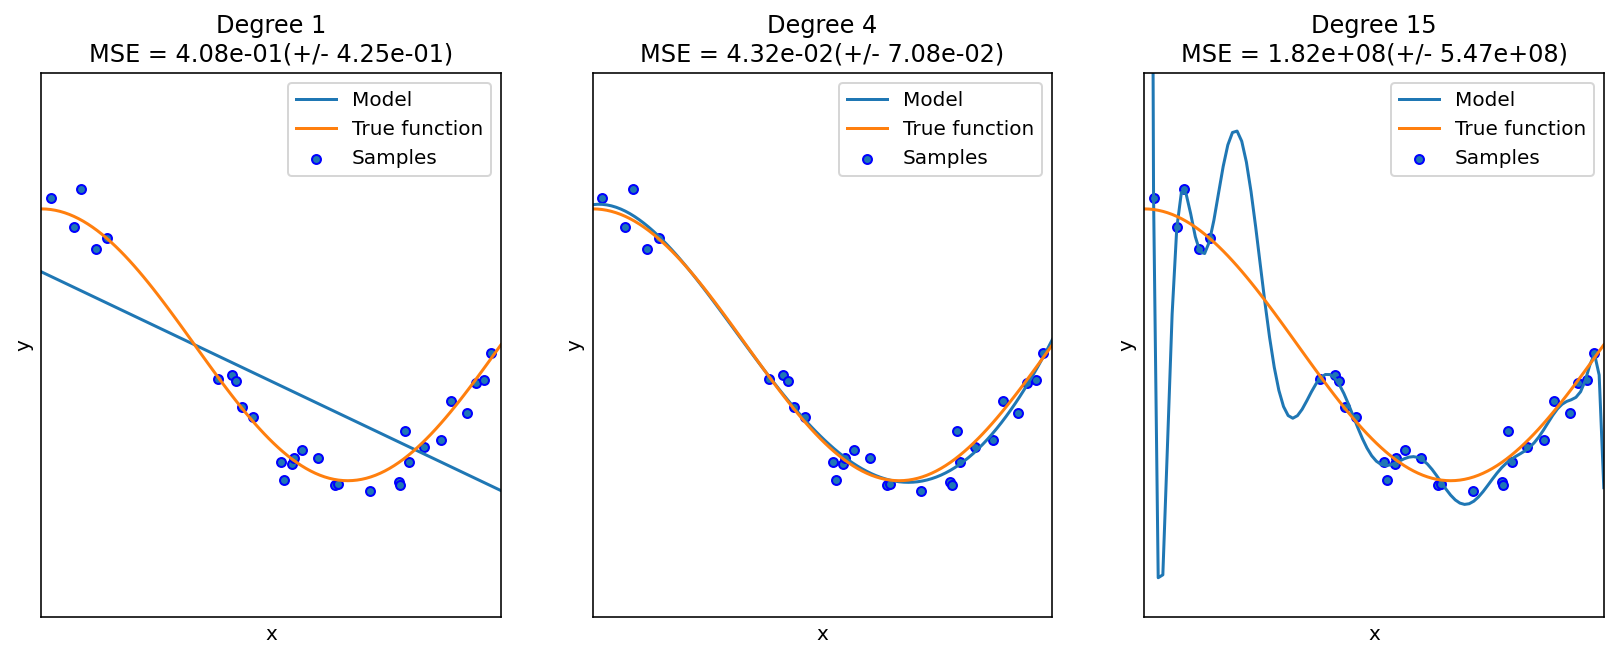

In [6]:
#| echo: false
#| column: page
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
# plt.show()

In [7]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

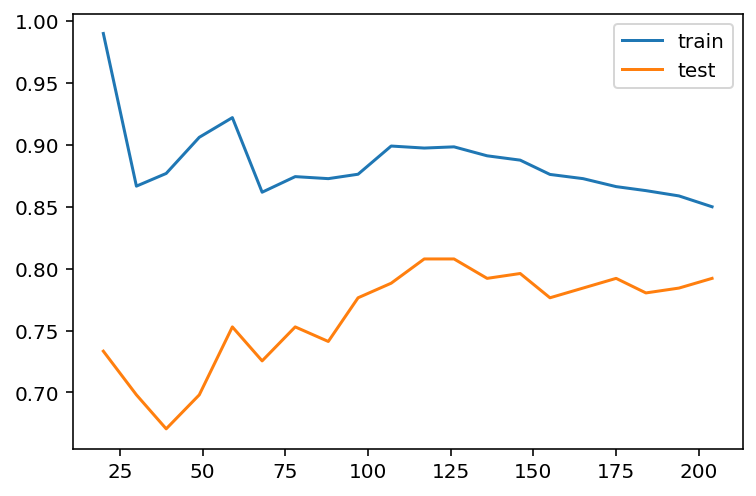

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

clf = LogisticRegression(max_iter=1000)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()

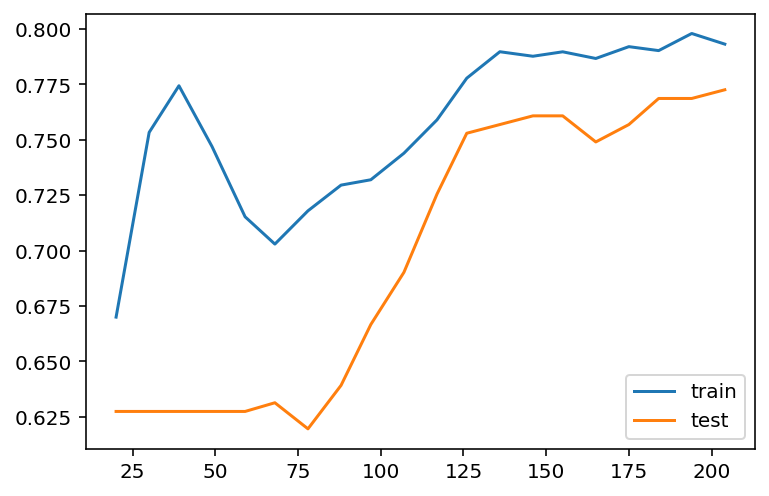

In [9]:
clf = LogisticRegression(max_iter=1000, C=0.1)
steps = [('scalar', MinMaxScaler()),
         ('log', clf)]
pipe = Pipeline(steps=steps)
from sklearn.model_selection import learning_curve
import numpy as np
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train,
                                                        train_sizes=np.linspace(0.1, 1, 20))

import matplotlib.pyplot as plt
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.legend()

In [10]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)

df.fillna(0, inplace=True)
df.drop(columns=[2, 24, 25, 26, 27], inplace=True)
df[23].replace({1: 1, 2: 0}, inplace=True)
X = df.iloc[:, :-1].to_numpy().astype(float)
y = df[23].to_numpy().astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [12]:
#| output: false
import keras_core as keras
from keras import models, layers
model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1]))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30, validation_data=(X_test, y_test))

Using TensorFlow backend


Epoch 1/400


1/9 [==>...........................] - ETA: 3s - loss: 0.7103 - accuracy: 0.6000

9/9 [==============================] - 1s 24ms/step - loss: 0.6917 - accuracy: 0.5961 - val_loss: 0.7019 - val_accuracy: 0.5333


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6921 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6777 - accuracy: 0.5961 - val_loss: 0.6831 - val_accuracy: 0.5111


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7345 - accuracy: 0.4000

9/9 [==============================] - 0s 5ms/step - loss: 0.6648 - accuracy: 0.5961 - val_loss: 0.6672 - val_accuracy: 0.5111


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6603 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.6078 - val_loss: 0.6530 - val_accuracy: 0.5778


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6423 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6461 - accuracy: 0.6235 - val_loss: 0.6410 - val_accuracy: 0.6222


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6129 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6393 - accuracy: 0.6275 - val_loss: 0.6305 - val_accuracy: 0.6444


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6882 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6332 - accuracy: 0.6157 - val_loss: 0.6220 - val_accuracy: 0.6667


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5992 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6285 - accuracy: 0.6157 - val_loss: 0.6147 - val_accuracy: 0.6667


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6355 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.6314 - val_loss: 0.6085 - val_accuracy: 0.7111


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6104 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.6353 - val_loss: 0.6034 - val_accuracy: 0.6889


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5179 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6192 - accuracy: 0.6471 - val_loss: 0.5993 - val_accuracy: 0.6667


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6385 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6167 - accuracy: 0.6392 - val_loss: 0.5968 - val_accuracy: 0.6667


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6151 - accuracy: 0.6392 - val_loss: 0.5937 - val_accuracy: 0.6889


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6131 - accuracy: 0.6392 - val_loss: 0.5909 - val_accuracy: 0.6889


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5652 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.6113 - accuracy: 0.6471 - val_loss: 0.5887 - val_accuracy: 0.6889


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6647 - accuracy: 0.5000

9/9 [==============================] - 0s 6ms/step - loss: 0.6097 - accuracy: 0.6471 - val_loss: 0.5867 - val_accuracy: 0.6889


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6083 - accuracy: 0.6510 - val_loss: 0.5841 - val_accuracy: 0.7111


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6077 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6069 - accuracy: 0.6471 - val_loss: 0.5820 - val_accuracy: 0.7111


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6231 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6054 - accuracy: 0.6510 - val_loss: 0.5804 - val_accuracy: 0.7333


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5689 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.6549 - val_loss: 0.5790 - val_accuracy: 0.7333


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4977 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6028 - accuracy: 0.6588 - val_loss: 0.5780 - val_accuracy: 0.7333


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6300 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6016 - accuracy: 0.6627 - val_loss: 0.5772 - val_accuracy: 0.7333


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6212 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6004 - accuracy: 0.6588 - val_loss: 0.5759 - val_accuracy: 0.7333


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6321 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.5991 - accuracy: 0.6588 - val_loss: 0.5750 - val_accuracy: 0.7333


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5956 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5980 - accuracy: 0.6588 - val_loss: 0.5735 - val_accuracy: 0.7333


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6106 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5968 - accuracy: 0.6549 - val_loss: 0.5730 - val_accuracy: 0.7333


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5606 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.6549 - val_loss: 0.5719 - val_accuracy: 0.7333


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5329 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5944 - accuracy: 0.6549 - val_loss: 0.5710 - val_accuracy: 0.7333


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5932 - accuracy: 0.6549 - val_loss: 0.5701 - val_accuracy: 0.7333


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5651 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5921 - accuracy: 0.6549 - val_loss: 0.5693 - val_accuracy: 0.7111


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5454 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5910 - accuracy: 0.6627 - val_loss: 0.5684 - val_accuracy: 0.7111


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4874 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.6627 - val_loss: 0.5672 - val_accuracy: 0.7111


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5540 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.6667 - val_loss: 0.5664 - val_accuracy: 0.7111


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5876 - accuracy: 0.6667 - val_loss: 0.5651 - val_accuracy: 0.7111


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5519 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5867 - accuracy: 0.6706 - val_loss: 0.5642 - val_accuracy: 0.7111


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5862 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5855 - accuracy: 0.6745 - val_loss: 0.5633 - val_accuracy: 0.7111


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5693 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5846 - accuracy: 0.6706 - val_loss: 0.5621 - val_accuracy: 0.7111


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5899 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5835 - accuracy: 0.6784 - val_loss: 0.5615 - val_accuracy: 0.7111


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6746 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5824 - accuracy: 0.6784 - val_loss: 0.5608 - val_accuracy: 0.7111


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5591 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.6784 - val_loss: 0.5600 - val_accuracy: 0.7111


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5617 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5804 - accuracy: 0.6745 - val_loss: 0.5593 - val_accuracy: 0.7111


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5660 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5794 - accuracy: 0.6706 - val_loss: 0.5587 - val_accuracy: 0.7111


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5557 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5784 - accuracy: 0.6706 - val_loss: 0.5584 - val_accuracy: 0.7111


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5520 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5776 - accuracy: 0.6745 - val_loss: 0.5570 - val_accuracy: 0.7111


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5136 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.6745 - val_loss: 0.5566 - val_accuracy: 0.7111


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5757 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5754 - accuracy: 0.6667 - val_loss: 0.5565 - val_accuracy: 0.7111


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6014 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.5745 - accuracy: 0.6784 - val_loss: 0.5558 - val_accuracy: 0.6889


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5722 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5734 - accuracy: 0.6824 - val_loss: 0.5556 - val_accuracy: 0.6889


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5789 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5725 - accuracy: 0.6824 - val_loss: 0.5550 - val_accuracy: 0.6889


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6173 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5716 - accuracy: 0.6863 - val_loss: 0.5544 - val_accuracy: 0.6889


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5995 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5707 - accuracy: 0.6980 - val_loss: 0.5539 - val_accuracy: 0.6889


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5977 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5698 - accuracy: 0.6980 - val_loss: 0.5528 - val_accuracy: 0.6889


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5453 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5688 - accuracy: 0.6980 - val_loss: 0.5525 - val_accuracy: 0.6667


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5133 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5680 - accuracy: 0.6980 - val_loss: 0.5519 - val_accuracy: 0.6667


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6155 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5670 - accuracy: 0.7020 - val_loss: 0.5510 - val_accuracy: 0.6667


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5662 - accuracy: 0.7059 - val_loss: 0.5501 - val_accuracy: 0.6667


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5379 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.7059 - val_loss: 0.5495 - val_accuracy: 0.6667


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5600 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5643 - accuracy: 0.7137 - val_loss: 0.5489 - val_accuracy: 0.6667


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5634 - accuracy: 0.7137 - val_loss: 0.5486 - val_accuracy: 0.6667


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.7137 - val_loss: 0.5483 - val_accuracy: 0.6667


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5465 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5617 - accuracy: 0.7137 - val_loss: 0.5481 - val_accuracy: 0.6667


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.6667

9/9 [==============================] - 0s 6ms/step - loss: 0.5609 - accuracy: 0.7137 - val_loss: 0.5480 - val_accuracy: 0.6667


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5600 - accuracy: 0.7137 - val_loss: 0.5473 - val_accuracy: 0.6667


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5745 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5591 - accuracy: 0.7098 - val_loss: 0.5467 - val_accuracy: 0.6667


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5813 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5582 - accuracy: 0.7137 - val_loss: 0.5456 - val_accuracy: 0.6667


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5568 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5575 - accuracy: 0.7216 - val_loss: 0.5447 - val_accuracy: 0.6667


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5566 - accuracy: 0.7216 - val_loss: 0.5442 - val_accuracy: 0.6667


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5467 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5559 - accuracy: 0.7137 - val_loss: 0.5438 - val_accuracy: 0.6667


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5573 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5551 - accuracy: 0.7137 - val_loss: 0.5434 - val_accuracy: 0.6667


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5511 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5543 - accuracy: 0.7216 - val_loss: 0.5427 - val_accuracy: 0.6667


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5534 - accuracy: 0.7216 - val_loss: 0.5423 - val_accuracy: 0.6667


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5755 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5527 - accuracy: 0.7176 - val_loss: 0.5417 - val_accuracy: 0.6667


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5280 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5519 - accuracy: 0.7176 - val_loss: 0.5414 - val_accuracy: 0.6667


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5964 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5511 - accuracy: 0.7176 - val_loss: 0.5407 - val_accuracy: 0.6667


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5503 - accuracy: 0.7176 - val_loss: 0.5404 - val_accuracy: 0.6667


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5497 - accuracy: 0.7176 - val_loss: 0.5398 - val_accuracy: 0.6667


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5489 - accuracy: 0.7176 - val_loss: 0.5395 - val_accuracy: 0.6667


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5758 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5480 - accuracy: 0.7216 - val_loss: 0.5395 - val_accuracy: 0.6889


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5697 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5474 - accuracy: 0.7255 - val_loss: 0.5397 - val_accuracy: 0.6889


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5466 - accuracy: 0.7255 - val_loss: 0.5390 - val_accuracy: 0.6889


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5458 - accuracy: 0.7255 - val_loss: 0.5384 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4580 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5450 - accuracy: 0.7255 - val_loss: 0.5381 - val_accuracy: 0.6889


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5474 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5444 - accuracy: 0.7294 - val_loss: 0.5381 - val_accuracy: 0.6889


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5223 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.5437 - accuracy: 0.7294 - val_loss: 0.5376 - val_accuracy: 0.6889


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5310 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5429 - accuracy: 0.7294 - val_loss: 0.5374 - val_accuracy: 0.6889


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5988 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5422 - accuracy: 0.7294 - val_loss: 0.5373 - val_accuracy: 0.6889


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5696 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5415 - accuracy: 0.7255 - val_loss: 0.5368 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6134 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5408 - accuracy: 0.7255 - val_loss: 0.5365 - val_accuracy: 0.6889


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4882 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5402 - accuracy: 0.7294 - val_loss: 0.5359 - val_accuracy: 0.6889


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5858 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5394 - accuracy: 0.7333 - val_loss: 0.5357 - val_accuracy: 0.6889


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4787 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5388 - accuracy: 0.7373 - val_loss: 0.5353 - val_accuracy: 0.6889


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5015 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5381 - accuracy: 0.7333 - val_loss: 0.5350 - val_accuracy: 0.6889


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5507 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5373 - accuracy: 0.7333 - val_loss: 0.5351 - val_accuracy: 0.6889


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6165 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5368 - accuracy: 0.7373 - val_loss: 0.5355 - val_accuracy: 0.6889


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5456 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5360 - accuracy: 0.7373 - val_loss: 0.5349 - val_accuracy: 0.6889


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5610 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5354 - accuracy: 0.7373 - val_loss: 0.5342 - val_accuracy: 0.6889


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4653 - accuracy: 0.8000

9/9 [==============================] - 0s 6ms/step - loss: 0.5347 - accuracy: 0.7373 - val_loss: 0.5342 - val_accuracy: 0.6889


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4979 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5341 - accuracy: 0.7412 - val_loss: 0.5335 - val_accuracy: 0.6889


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5674 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5334 - accuracy: 0.7412 - val_loss: 0.5331 - val_accuracy: 0.6889


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5967 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5327 - accuracy: 0.7412 - val_loss: 0.5327 - val_accuracy: 0.6889


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4738 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5322 - accuracy: 0.7412 - val_loss: 0.5324 - val_accuracy: 0.6889


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5451 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5314 - accuracy: 0.7412 - val_loss: 0.5324 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5466 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5308 - accuracy: 0.7412 - val_loss: 0.5317 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6742 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.5302 - accuracy: 0.7412 - val_loss: 0.5316 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4860 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5296 - accuracy: 0.7412 - val_loss: 0.5308 - val_accuracy: 0.6889


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5289 - accuracy: 0.7412 - val_loss: 0.5303 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5283 - accuracy: 0.7412 - val_loss: 0.5299 - val_accuracy: 0.6889


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5319 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.5279 - accuracy: 0.7412 - val_loss: 0.5290 - val_accuracy: 0.6889


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5411 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5271 - accuracy: 0.7412 - val_loss: 0.5296 - val_accuracy: 0.6889


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5154 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5264 - accuracy: 0.7412 - val_loss: 0.5292 - val_accuracy: 0.6889


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6112 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5259 - accuracy: 0.7412 - val_loss: 0.5297 - val_accuracy: 0.6889


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5254 - accuracy: 0.7412 - val_loss: 0.5300 - val_accuracy: 0.6889


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5601 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5246 - accuracy: 0.7412 - val_loss: 0.5291 - val_accuracy: 0.6889


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5854 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5241 - accuracy: 0.7412 - val_loss: 0.5291 - val_accuracy: 0.6889


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4949 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5235 - accuracy: 0.7412 - val_loss: 0.5283 - val_accuracy: 0.6889


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5362 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.5229 - accuracy: 0.7412 - val_loss: 0.5280 - val_accuracy: 0.6889


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5224 - accuracy: 0.7412 - val_loss: 0.5284 - val_accuracy: 0.6889


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5027 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5217 - accuracy: 0.7412 - val_loss: 0.5280 - val_accuracy: 0.6889


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5211 - accuracy: 0.7412 - val_loss: 0.5272 - val_accuracy: 0.6889


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.5207 - accuracy: 0.7412 - val_loss: 0.5267 - val_accuracy: 0.6889


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5252 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5201 - accuracy: 0.7451 - val_loss: 0.5261 - val_accuracy: 0.6889


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5413 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5196 - accuracy: 0.7451 - val_loss: 0.5263 - val_accuracy: 0.6889


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.5189 - accuracy: 0.7529 - val_loss: 0.5261 - val_accuracy: 0.6889


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6108 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5185 - accuracy: 0.7490 - val_loss: 0.5261 - val_accuracy: 0.6889


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5179 - accuracy: 0.7529 - val_loss: 0.5251 - val_accuracy: 0.6889


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5039 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5174 - accuracy: 0.7529 - val_loss: 0.5254 - val_accuracy: 0.6667


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4658 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5169 - accuracy: 0.7569 - val_loss: 0.5261 - val_accuracy: 0.6667


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4888 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5163 - accuracy: 0.7529 - val_loss: 0.5258 - val_accuracy: 0.6667


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4374 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5157 - accuracy: 0.7569 - val_loss: 0.5254 - val_accuracy: 0.6667


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5153 - accuracy: 0.7529 - val_loss: 0.5254 - val_accuracy: 0.6667


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5125 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5147 - accuracy: 0.7569 - val_loss: 0.5249 - val_accuracy: 0.6667


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5261 - accuracy: 0.7333

9/9 [==============================] - 0s 6ms/step - loss: 0.5142 - accuracy: 0.7569 - val_loss: 0.5249 - val_accuracy: 0.6667


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6281 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5137 - accuracy: 0.7569 - val_loss: 0.5254 - val_accuracy: 0.6667


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5131 - accuracy: 0.7569 - val_loss: 0.5251 - val_accuracy: 0.6667


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4767 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5126 - accuracy: 0.7569 - val_loss: 0.5244 - val_accuracy: 0.6667


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4850 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5121 - accuracy: 0.7569 - val_loss: 0.5240 - val_accuracy: 0.6667


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5361 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5116 - accuracy: 0.7569 - val_loss: 0.5237 - val_accuracy: 0.6667


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6259 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5111 - accuracy: 0.7569 - val_loss: 0.5235 - val_accuracy: 0.6667


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5188 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5106 - accuracy: 0.7569 - val_loss: 0.5226 - val_accuracy: 0.6667


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5247 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.5101 - accuracy: 0.7569 - val_loss: 0.5223 - val_accuracy: 0.6667


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7569 - val_loss: 0.5222 - val_accuracy: 0.6667


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4988 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5092 - accuracy: 0.7569 - val_loss: 0.5227 - val_accuracy: 0.6444


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5087 - accuracy: 0.7647 - val_loss: 0.5230 - val_accuracy: 0.6667


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4967 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5082 - accuracy: 0.7686 - val_loss: 0.5233 - val_accuracy: 0.6667


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6415 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5078 - accuracy: 0.7686 - val_loss: 0.5235 - val_accuracy: 0.6444


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5553 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5072 - accuracy: 0.7686 - val_loss: 0.5228 - val_accuracy: 0.6667


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5548 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5068 - accuracy: 0.7686 - val_loss: 0.5222 - val_accuracy: 0.6667


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5915 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5063 - accuracy: 0.7686 - val_loss: 0.5220 - val_accuracy: 0.6667


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4820 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.7686 - val_loss: 0.5223 - val_accuracy: 0.6444


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4249 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5054 - accuracy: 0.7686 - val_loss: 0.5221 - val_accuracy: 0.6444


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4475 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.5049 - accuracy: 0.7765 - val_loss: 0.5228 - val_accuracy: 0.6444


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5182 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.5045 - accuracy: 0.7765 - val_loss: 0.5225 - val_accuracy: 0.6444


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.7725 - val_loss: 0.5210 - val_accuracy: 0.6444


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5578 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5035 - accuracy: 0.7686 - val_loss: 0.5203 - val_accuracy: 0.6444


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5905 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.5031 - accuracy: 0.7686 - val_loss: 0.5199 - val_accuracy: 0.6444


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5029 - accuracy: 0.7686 - val_loss: 0.5204 - val_accuracy: 0.6444


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6373 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.5022 - accuracy: 0.7725 - val_loss: 0.5201 - val_accuracy: 0.6444


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5570 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5018 - accuracy: 0.7725 - val_loss: 0.5197 - val_accuracy: 0.6444


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4707 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.5013 - accuracy: 0.7686 - val_loss: 0.5188 - val_accuracy: 0.6444


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5167 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.5009 - accuracy: 0.7686 - val_loss: 0.5187 - val_accuracy: 0.6444


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4322 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.5005 - accuracy: 0.7686 - val_loss: 0.5183 - val_accuracy: 0.6444


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5024 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.7725 - val_loss: 0.5187 - val_accuracy: 0.6444


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4996 - accuracy: 0.7725 - val_loss: 0.5186 - val_accuracy: 0.6444


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4633 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4992 - accuracy: 0.7725 - val_loss: 0.5191 - val_accuracy: 0.6444


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5148 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4987 - accuracy: 0.7804 - val_loss: 0.5187 - val_accuracy: 0.6444


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6039 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4983 - accuracy: 0.7804 - val_loss: 0.5193 - val_accuracy: 0.6444


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5320 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4979 - accuracy: 0.7804 - val_loss: 0.5195 - val_accuracy: 0.6444


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4457 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4975 - accuracy: 0.7961 - val_loss: 0.5200 - val_accuracy: 0.6444


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5268 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4971 - accuracy: 0.7961 - val_loss: 0.5201 - val_accuracy: 0.6444


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4572 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4966 - accuracy: 0.7961 - val_loss: 0.5192 - val_accuracy: 0.6444


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.8333

9/9 [==============================] - 0s 6ms/step - loss: 0.4962 - accuracy: 0.7961 - val_loss: 0.5188 - val_accuracy: 0.6444


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4958 - accuracy: 0.7961 - val_loss: 0.5188 - val_accuracy: 0.6444


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4927 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7961 - val_loss: 0.5190 - val_accuracy: 0.6444


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5680 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4950 - accuracy: 0.7961 - val_loss: 0.5185 - val_accuracy: 0.6444


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4944 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4945 - accuracy: 0.7961 - val_loss: 0.5178 - val_accuracy: 0.6444


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4942 - accuracy: 0.7961 - val_loss: 0.5174 - val_accuracy: 0.6444


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4800 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4938 - accuracy: 0.7961 - val_loss: 0.5169 - val_accuracy: 0.6444


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4662 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4935 - accuracy: 0.7961 - val_loss: 0.5163 - val_accuracy: 0.6444


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5830 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4930 - accuracy: 0.7922 - val_loss: 0.5163 - val_accuracy: 0.6444


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4926 - accuracy: 0.7922 - val_loss: 0.5159 - val_accuracy: 0.6444


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4432 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4922 - accuracy: 0.7922 - val_loss: 0.5159 - val_accuracy: 0.6444


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4663 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4918 - accuracy: 0.7922 - val_loss: 0.5156 - val_accuracy: 0.6444


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.7922 - val_loss: 0.5155 - val_accuracy: 0.6444


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4354 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4910 - accuracy: 0.7961 - val_loss: 0.5158 - val_accuracy: 0.6444


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4336 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4906 - accuracy: 0.7961 - val_loss: 0.5162 - val_accuracy: 0.6667


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4894 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4903 - accuracy: 0.7961 - val_loss: 0.5160 - val_accuracy: 0.6667


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4064 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4900 - accuracy: 0.7961 - val_loss: 0.5156 - val_accuracy: 0.6667


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4918 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4897 - accuracy: 0.7961 - val_loss: 0.5165 - val_accuracy: 0.6667


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5177 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.7961 - val_loss: 0.5166 - val_accuracy: 0.6667


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4276 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4888 - accuracy: 0.7961 - val_loss: 0.5162 - val_accuracy: 0.6667


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4884 - accuracy: 0.7961 - val_loss: 0.5164 - val_accuracy: 0.6667


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4700 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4881 - accuracy: 0.7961 - val_loss: 0.5170 - val_accuracy: 0.6667


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5082 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4878 - accuracy: 0.7961 - val_loss: 0.5173 - val_accuracy: 0.6667


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4873 - accuracy: 0.7961 - val_loss: 0.5169 - val_accuracy: 0.6667


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3970 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4870 - accuracy: 0.7961 - val_loss: 0.5167 - val_accuracy: 0.6667


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4710 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4866 - accuracy: 0.7961 - val_loss: 0.5162 - val_accuracy: 0.6667


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4605 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4862 - accuracy: 0.7961 - val_loss: 0.5154 - val_accuracy: 0.6667


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4861 - accuracy: 0.7961 - val_loss: 0.5142 - val_accuracy: 0.6667


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4856 - accuracy: 0.7961 - val_loss: 0.5152 - val_accuracy: 0.6667


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4852 - accuracy: 0.7961 - val_loss: 0.5146 - val_accuracy: 0.6667


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5035 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.7922 - val_loss: 0.5151 - val_accuracy: 0.6667


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5705 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4845 - accuracy: 0.7922 - val_loss: 0.5151 - val_accuracy: 0.6667


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4987 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4841 - accuracy: 0.7922 - val_loss: 0.5146 - val_accuracy: 0.6667


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5036 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4838 - accuracy: 0.7922 - val_loss: 0.5143 - val_accuracy: 0.6667


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5024 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4837 - accuracy: 0.7922 - val_loss: 0.5149 - val_accuracy: 0.6667


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4831 - accuracy: 0.7922 - val_loss: 0.5142 - val_accuracy: 0.6667


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4827 - accuracy: 0.7922 - val_loss: 0.5143 - val_accuracy: 0.6667


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5404 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4824 - accuracy: 0.7922 - val_loss: 0.5147 - val_accuracy: 0.6667


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4821 - accuracy: 0.7922 - val_loss: 0.5146 - val_accuracy: 0.6667


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5558 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4817 - accuracy: 0.7922 - val_loss: 0.5144 - val_accuracy: 0.6667


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4106 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4816 - accuracy: 0.7922 - val_loss: 0.5139 - val_accuracy: 0.6667


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4579 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4812 - accuracy: 0.7922 - val_loss: 0.5153 - val_accuracy: 0.6667


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5642 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.7922 - val_loss: 0.5155 - val_accuracy: 0.6667


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4804 - accuracy: 0.7922 - val_loss: 0.5145 - val_accuracy: 0.6667


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5635 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4800 - accuracy: 0.7922 - val_loss: 0.5143 - val_accuracy: 0.6667


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5076 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4797 - accuracy: 0.7922 - val_loss: 0.5140 - val_accuracy: 0.6667


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5238 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.7922 - val_loss: 0.5140 - val_accuracy: 0.6667


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5217 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4792 - accuracy: 0.7922 - val_loss: 0.5145 - val_accuracy: 0.6667


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3758 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4787 - accuracy: 0.7922 - val_loss: 0.5137 - val_accuracy: 0.6667


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5077 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.7922 - val_loss: 0.5138 - val_accuracy: 0.6667


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5562 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.7922 - val_loss: 0.5129 - val_accuracy: 0.6667


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4773 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4780 - accuracy: 0.7922 - val_loss: 0.5137 - val_accuracy: 0.6667


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4164 - accuracy: 0.9667

9/9 [==============================] - 0s 5ms/step - loss: 0.4775 - accuracy: 0.7922 - val_loss: 0.5134 - val_accuracy: 0.6667


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4491 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4771 - accuracy: 0.7922 - val_loss: 0.5133 - val_accuracy: 0.6667


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.7922 - val_loss: 0.5127 - val_accuracy: 0.6667


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4577 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4765 - accuracy: 0.7922 - val_loss: 0.5134 - val_accuracy: 0.6667


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5568 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4763 - accuracy: 0.7922 - val_loss: 0.5136 - val_accuracy: 0.6667


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5014 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7922 - val_loss: 0.5132 - val_accuracy: 0.6667


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4643 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4756 - accuracy: 0.7922 - val_loss: 0.5121 - val_accuracy: 0.6667


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4752 - accuracy: 0.7922 - val_loss: 0.5121 - val_accuracy: 0.6667


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4749 - accuracy: 0.7922 - val_loss: 0.5122 - val_accuracy: 0.6667


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.9667

9/9 [==============================] - 0s 5ms/step - loss: 0.4747 - accuracy: 0.7922 - val_loss: 0.5119 - val_accuracy: 0.6667


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4743 - accuracy: 0.7922 - val_loss: 0.5117 - val_accuracy: 0.6667


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4523 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.7922 - val_loss: 0.5116 - val_accuracy: 0.6667


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4739 - accuracy: 0.7922 - val_loss: 0.5107 - val_accuracy: 0.6667


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4735 - accuracy: 0.7922 - val_loss: 0.5114 - val_accuracy: 0.6667


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5407 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.7922 - val_loss: 0.5114 - val_accuracy: 0.6667


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4729 - accuracy: 0.7922 - val_loss: 0.5111 - val_accuracy: 0.6667


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4726 - accuracy: 0.7922 - val_loss: 0.5112 - val_accuracy: 0.6667


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5220 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.7922 - val_loss: 0.5110 - val_accuracy: 0.6667


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7922 - val_loss: 0.5100 - val_accuracy: 0.6667


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4717 - accuracy: 0.7922 - val_loss: 0.5102 - val_accuracy: 0.6667


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4955 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.7922 - val_loss: 0.5104 - val_accuracy: 0.6667


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4712 - accuracy: 0.7922 - val_loss: 0.5100 - val_accuracy: 0.6667


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4708 - accuracy: 0.7922 - val_loss: 0.5100 - val_accuracy: 0.6667


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4705 - accuracy: 0.7961 - val_loss: 0.5104 - val_accuracy: 0.6667


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4567 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 0.7961 - val_loss: 0.5102 - val_accuracy: 0.6667


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.9000

9/9 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7961 - val_loss: 0.5106 - val_accuracy: 0.6667


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5069 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4696 - accuracy: 0.8000 - val_loss: 0.5106 - val_accuracy: 0.6667


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.8039 - val_loss: 0.5114 - val_accuracy: 0.6667


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4337 - accuracy: 0.8000

9/9 [==============================] - 0s 10ms/step - loss: 0.4691 - accuracy: 0.7961 - val_loss: 0.5120 - val_accuracy: 0.6667


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.8000 - val_loss: 0.5119 - val_accuracy: 0.6667


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4822 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4685 - accuracy: 0.8000 - val_loss: 0.5122 - val_accuracy: 0.6667


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4694 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4682 - accuracy: 0.8000 - val_loss: 0.5119 - val_accuracy: 0.6667


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5491 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4679 - accuracy: 0.8000 - val_loss: 0.5125 - val_accuracy: 0.6667


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4449 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.8000 - val_loss: 0.5129 - val_accuracy: 0.6667


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5029 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.8000 - val_loss: 0.5129 - val_accuracy: 0.6667


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3810 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.8000 - val_loss: 0.5123 - val_accuracy: 0.6667


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5593 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4669 - accuracy: 0.8000 - val_loss: 0.5127 - val_accuracy: 0.6667


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3277 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4666 - accuracy: 0.8000 - val_loss: 0.5122 - val_accuracy: 0.6667


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4965 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.4664 - accuracy: 0.8000 - val_loss: 0.5117 - val_accuracy: 0.6667


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5965 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4660 - accuracy: 0.8000 - val_loss: 0.5118 - val_accuracy: 0.6667


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4132 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.8000 - val_loss: 0.5122 - val_accuracy: 0.6667


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5109 - accuracy: 0.7667

9/9 [==============================] - 0s 6ms/step - loss: 0.4655 - accuracy: 0.8000 - val_loss: 0.5123 - val_accuracy: 0.6667


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6448 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.8000 - val_loss: 0.5120 - val_accuracy: 0.6667


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5292 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8000 - val_loss: 0.5117 - val_accuracy: 0.6667


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4303 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8000 - val_loss: 0.5110 - val_accuracy: 0.6667


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.8000 - val_loss: 0.5102 - val_accuracy: 0.6667


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.9333

9/9 [==============================] - 0s 4ms/step - loss: 0.4642 - accuracy: 0.8000 - val_loss: 0.5100 - val_accuracy: 0.6667


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4923 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4639 - accuracy: 0.8039 - val_loss: 0.5104 - val_accuracy: 0.6667


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4247 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4637 - accuracy: 0.8000 - val_loss: 0.5111 - val_accuracy: 0.6667


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4066 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4634 - accuracy: 0.8000 - val_loss: 0.5106 - val_accuracy: 0.6667


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5096 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.4633 - accuracy: 0.8000 - val_loss: 0.5097 - val_accuracy: 0.6667


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4430 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4629 - accuracy: 0.8000 - val_loss: 0.5101 - val_accuracy: 0.6667


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5071 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4627 - accuracy: 0.8000 - val_loss: 0.5105 - val_accuracy: 0.6667


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8667

9/9 [==============================] - 0s 6ms/step - loss: 0.4624 - accuracy: 0.8000 - val_loss: 0.5109 - val_accuracy: 0.6667


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4803 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.8039 - val_loss: 0.5112 - val_accuracy: 0.6667


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4619 - accuracy: 0.8039 - val_loss: 0.5112 - val_accuracy: 0.6667


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3667 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4616 - accuracy: 0.8039 - val_loss: 0.5113 - val_accuracy: 0.6667


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4615 - accuracy: 0.8078 - val_loss: 0.5106 - val_accuracy: 0.6667


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4762 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4611 - accuracy: 0.8039 - val_loss: 0.5107 - val_accuracy: 0.6667


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4609 - accuracy: 0.8039 - val_loss: 0.5108 - val_accuracy: 0.6667


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4606 - accuracy: 0.8039 - val_loss: 0.5109 - val_accuracy: 0.6667


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4580 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4604 - accuracy: 0.8039 - val_loss: 0.5102 - val_accuracy: 0.6667


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4065 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4601 - accuracy: 0.8039 - val_loss: 0.5103 - val_accuracy: 0.6667


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4598 - accuracy: 0.8039 - val_loss: 0.5100 - val_accuracy: 0.6667


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4596 - accuracy: 0.8039 - val_loss: 0.5096 - val_accuracy: 0.6667


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4656 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.8039 - val_loss: 0.5094 - val_accuracy: 0.6667


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4722 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.8039 - val_loss: 0.5104 - val_accuracy: 0.6667


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4295 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4590 - accuracy: 0.8039 - val_loss: 0.5091 - val_accuracy: 0.6667


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4586 - accuracy: 0.8039 - val_loss: 0.5088 - val_accuracy: 0.6667


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4136 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4584 - accuracy: 0.8000 - val_loss: 0.5082 - val_accuracy: 0.6667


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3659 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8000 - val_loss: 0.5076 - val_accuracy: 0.6667


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4828 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4579 - accuracy: 0.8000 - val_loss: 0.5080 - val_accuracy: 0.6667


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4704 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4578 - accuracy: 0.8039 - val_loss: 0.5086 - val_accuracy: 0.6667


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5272 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.8039 - val_loss: 0.5088 - val_accuracy: 0.6667


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4131 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.8039 - val_loss: 0.5081 - val_accuracy: 0.6667


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4571 - accuracy: 0.8039 - val_loss: 0.5088 - val_accuracy: 0.6667


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4567 - accuracy: 0.8039 - val_loss: 0.5082 - val_accuracy: 0.6667


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5724 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4565 - accuracy: 0.8039 - val_loss: 0.5080 - val_accuracy: 0.6667


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4562 - accuracy: 0.8039 - val_loss: 0.5079 - val_accuracy: 0.6667


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4562 - accuracy: 0.8039 - val_loss: 0.5087 - val_accuracy: 0.6667


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4295 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4558 - accuracy: 0.8039 - val_loss: 0.5081 - val_accuracy: 0.6667


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.8039 - val_loss: 0.5080 - val_accuracy: 0.6667


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5093 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4553 - accuracy: 0.8039 - val_loss: 0.5081 - val_accuracy: 0.6667


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4551 - accuracy: 0.8039 - val_loss: 0.5079 - val_accuracy: 0.6667


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4551 - accuracy: 0.8039 - val_loss: 0.5084 - val_accuracy: 0.6667


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.8039 - val_loss: 0.5076 - val_accuracy: 0.6667


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5415 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.8039 - val_loss: 0.5077 - val_accuracy: 0.6667


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4966 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4542 - accuracy: 0.8039 - val_loss: 0.5079 - val_accuracy: 0.6667


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4470 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4540 - accuracy: 0.8039 - val_loss: 0.5072 - val_accuracy: 0.6667


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4662 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4537 - accuracy: 0.8039 - val_loss: 0.5074 - val_accuracy: 0.6667


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4536 - accuracy: 0.8039 - val_loss: 0.5069 - val_accuracy: 0.6667


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4533 - accuracy: 0.8039 - val_loss: 0.5070 - val_accuracy: 0.6667


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4531 - accuracy: 0.8039 - val_loss: 0.5075 - val_accuracy: 0.6667


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4359 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4530 - accuracy: 0.8039 - val_loss: 0.5068 - val_accuracy: 0.6667


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4169 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4526 - accuracy: 0.8039 - val_loss: 0.5073 - val_accuracy: 0.6667


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.7667

9/9 [==============================] - 0s 7ms/step - loss: 0.4524 - accuracy: 0.8039 - val_loss: 0.5077 - val_accuracy: 0.6889


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4166 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4522 - accuracy: 0.8039 - val_loss: 0.5080 - val_accuracy: 0.6889


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5164 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4520 - accuracy: 0.8039 - val_loss: 0.5070 - val_accuracy: 0.6889


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4409 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4517 - accuracy: 0.8039 - val_loss: 0.5068 - val_accuracy: 0.6889


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4782 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4515 - accuracy: 0.8039 - val_loss: 0.5066 - val_accuracy: 0.6889


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4815 - accuracy: 0.8000

9/9 [==============================] - 0s 7ms/step - loss: 0.4513 - accuracy: 0.8039 - val_loss: 0.5073 - val_accuracy: 0.6889


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4910 - accuracy: 0.7333

9/9 [==============================] - 0s 8ms/step - loss: 0.4510 - accuracy: 0.8039 - val_loss: 0.5072 - val_accuracy: 0.6889


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8333

9/9 [==============================] - 0s 9ms/step - loss: 0.4508 - accuracy: 0.8039 - val_loss: 0.5077 - val_accuracy: 0.6889


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3887 - accuracy: 0.8667

9/9 [==============================] - 0s 8ms/step - loss: 0.4506 - accuracy: 0.8078 - val_loss: 0.5075 - val_accuracy: 0.6889


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4504 - accuracy: 0.8078 - val_loss: 0.5080 - val_accuracy: 0.6889


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5120 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.4501 - accuracy: 0.8078 - val_loss: 0.5079 - val_accuracy: 0.6889


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3444 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.8078 - val_loss: 0.5070 - val_accuracy: 0.6889


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3798 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4497 - accuracy: 0.8078 - val_loss: 0.5066 - val_accuracy: 0.6889


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5411 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4495 - accuracy: 0.8078 - val_loss: 0.5068 - val_accuracy: 0.6889


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4825 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4493 - accuracy: 0.8078 - val_loss: 0.5065 - val_accuracy: 0.6889


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4049 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4492 - accuracy: 0.8039 - val_loss: 0.5062 - val_accuracy: 0.6889


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4465 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4490 - accuracy: 0.8078 - val_loss: 0.5071 - val_accuracy: 0.6889


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5799 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.8078 - val_loss: 0.5077 - val_accuracy: 0.6889


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4764 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4484 - accuracy: 0.8078 - val_loss: 0.5076 - val_accuracy: 0.6889


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8078 - val_loss: 0.5070 - val_accuracy: 0.6889


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4846 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8078 - val_loss: 0.5062 - val_accuracy: 0.6889


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4266 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4478 - accuracy: 0.8078 - val_loss: 0.5067 - val_accuracy: 0.6889


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4476 - accuracy: 0.8078 - val_loss: 0.5068 - val_accuracy: 0.6889


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5749 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4473 - accuracy: 0.8078 - val_loss: 0.5072 - val_accuracy: 0.6889


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4664 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4472 - accuracy: 0.8039 - val_loss: 0.5075 - val_accuracy: 0.6889


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4905 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4471 - accuracy: 0.8039 - val_loss: 0.5072 - val_accuracy: 0.6889


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3952 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4467 - accuracy: 0.8039 - val_loss: 0.5079 - val_accuracy: 0.6889


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4170 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4466 - accuracy: 0.8039 - val_loss: 0.5078 - val_accuracy: 0.6889


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4502 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4465 - accuracy: 0.8039 - val_loss: 0.5070 - val_accuracy: 0.6889


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5456 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4464 - accuracy: 0.8039 - val_loss: 0.5077 - val_accuracy: 0.6889


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4459 - accuracy: 0.8039 - val_loss: 0.5072 - val_accuracy: 0.6889


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3651 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4458 - accuracy: 0.8039 - val_loss: 0.5066 - val_accuracy: 0.6889


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4597 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4455 - accuracy: 0.8039 - val_loss: 0.5062 - val_accuracy: 0.6889


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3815 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.8039 - val_loss: 0.5061 - val_accuracy: 0.6889


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4321 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.8039 - val_loss: 0.5067 - val_accuracy: 0.6889


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4777 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4450 - accuracy: 0.8078 - val_loss: 0.5072 - val_accuracy: 0.6889


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4447 - accuracy: 0.8078 - val_loss: 0.5067 - val_accuracy: 0.6889


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4938 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4445 - accuracy: 0.8039 - val_loss: 0.5061 - val_accuracy: 0.6889


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4444 - accuracy: 0.8039 - val_loss: 0.5057 - val_accuracy: 0.6889


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4372 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4441 - accuracy: 0.8039 - val_loss: 0.5055 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4440 - accuracy: 0.8039 - val_loss: 0.5050 - val_accuracy: 0.6889


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4407 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4438 - accuracy: 0.8039 - val_loss: 0.5046 - val_accuracy: 0.6889


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6107 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.4436 - accuracy: 0.8039 - val_loss: 0.5048 - val_accuracy: 0.6889


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.8039 - val_loss: 0.5049 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3500 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4432 - accuracy: 0.8039 - val_loss: 0.5047 - val_accuracy: 0.6889


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4430 - accuracy: 0.8039 - val_loss: 0.5053 - val_accuracy: 0.6889


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4458 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4428 - accuracy: 0.8039 - val_loss: 0.5058 - val_accuracy: 0.6889


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4760 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4426 - accuracy: 0.8078 - val_loss: 0.5064 - val_accuracy: 0.6889


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4019 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4424 - accuracy: 0.8078 - val_loss: 0.5065 - val_accuracy: 0.6889


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4104 - accuracy: 0.9333

9/9 [==============================] - 0s 5ms/step - loss: 0.4422 - accuracy: 0.8039 - val_loss: 0.5067 - val_accuracy: 0.7111


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3880 - accuracy: 0.8667

9/9 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.8078 - val_loss: 0.5058 - val_accuracy: 0.6889


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.8078 - val_loss: 0.5060 - val_accuracy: 0.6889


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5839 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.8039 - val_loss: 0.5068 - val_accuracy: 0.7111


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4414 - accuracy: 0.8039 - val_loss: 0.5068 - val_accuracy: 0.7111


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4769 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4412 - accuracy: 0.8039 - val_loss: 0.5066 - val_accuracy: 0.7111


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.8039 - val_loss: 0.5069 - val_accuracy: 0.7333


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4341 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.8039 - val_loss: 0.5067 - val_accuracy: 0.7333


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3647 - accuracy: 0.9000

9/9 [==============================] - 0s 5ms/step - loss: 0.4407 - accuracy: 0.8039 - val_loss: 0.5065 - val_accuracy: 0.7333


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4407 - accuracy: 0.8039 - val_loss: 0.5070 - val_accuracy: 0.7333


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4331 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4403 - accuracy: 0.8039 - val_loss: 0.5070 - val_accuracy: 0.7333


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4939 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4402 - accuracy: 0.8039 - val_loss: 0.5065 - val_accuracy: 0.7333


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.4399 - accuracy: 0.8078 - val_loss: 0.5064 - val_accuracy: 0.7333


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4768 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4398 - accuracy: 0.8078 - val_loss: 0.5071 - val_accuracy: 0.7333


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4370 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4396 - accuracy: 0.8078 - val_loss: 0.5073 - val_accuracy: 0.7333


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4130 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4394 - accuracy: 0.8078 - val_loss: 0.5070 - val_accuracy: 0.7333


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4798 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.8078 - val_loss: 0.5073 - val_accuracy: 0.7333


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4605 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4391 - accuracy: 0.8078 - val_loss: 0.5066 - val_accuracy: 0.7333


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.8000

9/9 [==============================] - 0s 4ms/step - loss: 0.4388 - accuracy: 0.8078 - val_loss: 0.5067 - val_accuracy: 0.7333


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4231 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4387 - accuracy: 0.8078 - val_loss: 0.5070 - val_accuracy: 0.7333


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3846 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.4385 - accuracy: 0.8078 - val_loss: 0.5069 - val_accuracy: 0.7333


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4376 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4383 - accuracy: 0.8078 - val_loss: 0.5065 - val_accuracy: 0.7333


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5089 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.8078 - val_loss: 0.5055 - val_accuracy: 0.7333


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5305 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4379 - accuracy: 0.8118 - val_loss: 0.5054 - val_accuracy: 0.7333


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4378 - accuracy: 0.8118 - val_loss: 0.5047 - val_accuracy: 0.7333


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5276 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.8078 - val_loss: 0.5060 - val_accuracy: 0.7333


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.8118 - val_loss: 0.5052 - val_accuracy: 0.7333


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3907 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4373 - accuracy: 0.8118 - val_loss: 0.5047 - val_accuracy: 0.7333


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.4370 - accuracy: 0.8118 - val_loss: 0.5048 - val_accuracy: 0.7333


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4340 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4368 - accuracy: 0.8118 - val_loss: 0.5046 - val_accuracy: 0.7333


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.4366 - accuracy: 0.8118 - val_loss: 0.5044 - val_accuracy: 0.7333


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4365 - accuracy: 0.8118 - val_loss: 0.5047 - val_accuracy: 0.7333


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.4364 - accuracy: 0.8118 - val_loss: 0.5037 - val_accuracy: 0.7111


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.4361 - accuracy: 0.8118 - val_loss: 0.5038 - val_accuracy: 0.7333


In [13]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

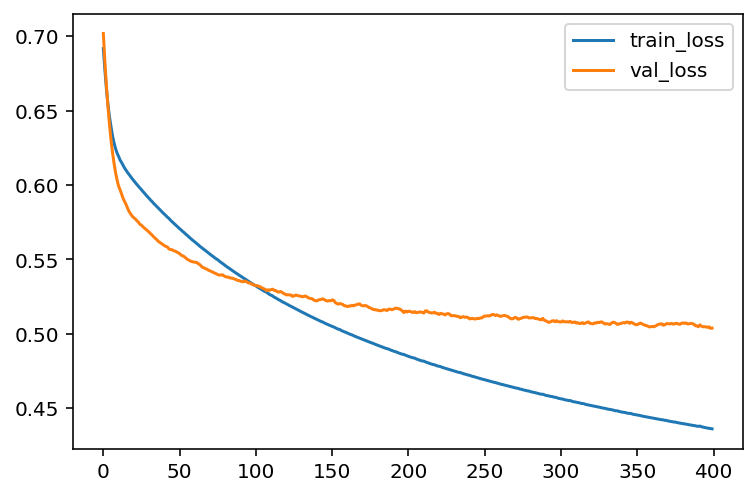

In [14]:
import matplotlib.pyplot as plt
plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

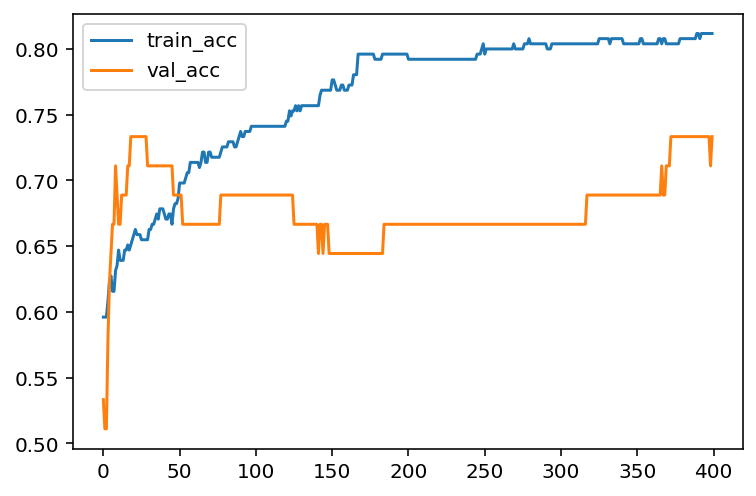

In [15]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

In [16]:
#| output: false
from keras import models, layers, regularizers

model = models.Sequential()

model.add(layers.Dense(1, activation='sigmoid', input_dim=X_train.shape[1],
                       kernel_regularizer=regularizers.L2(0.5)))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=400, batch_size=30,
                 validation_data=(X_test, y_test))

Epoch 1/400


1/9 [==>...........................] - ETA: 2s - loss: 1.6760 - accuracy: 0.3333

9/9 [==============================] - 0s 18ms/step - loss: 1.5655 - accuracy: 0.5176 - val_loss: 1.3861 - val_accuracy: 0.7111


Epoch 2/400


1/9 [==>...........................] - ETA: 0s - loss: 1.4140 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 1.4083 - accuracy: 0.5490 - val_loss: 1.2487 - val_accuracy: 0.8000


Epoch 3/400


1/9 [==>...........................] - ETA: 0s - loss: 1.3053 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 1.2780 - accuracy: 0.5569 - val_loss: 1.1375 - val_accuracy: 0.7778


Epoch 4/400


1/9 [==>...........................] - ETA: 0s - loss: 1.2374 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 1.1716 - accuracy: 0.6039 - val_loss: 1.0467 - val_accuracy: 0.8000


Epoch 5/400


1/9 [==>...........................] - ETA: 0s - loss: 1.0915 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 1.0840 - accuracy: 0.6392 - val_loss: 0.9718 - val_accuracy: 0.7778


Epoch 6/400


1/9 [==>...........................] - ETA: 0s - loss: 1.0415 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 1.0112 - accuracy: 0.6235 - val_loss: 0.9101 - val_accuracy: 0.7333


Epoch 7/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9907 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.9510 - accuracy: 0.6275 - val_loss: 0.8595 - val_accuracy: 0.7111


Epoch 8/400


1/9 [==>...........................] - ETA: 0s - loss: 0.9292 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.9013 - accuracy: 0.6275 - val_loss: 0.8186 - val_accuracy: 0.6889


Epoch 9/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8912 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.8600 - accuracy: 0.6235 - val_loss: 0.7846 - val_accuracy: 0.7111


Epoch 10/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8633 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.8257 - accuracy: 0.6157 - val_loss: 0.7569 - val_accuracy: 0.7111


Epoch 11/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7844 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.7977 - accuracy: 0.6235 - val_loss: 0.7344 - val_accuracy: 0.7111


Epoch 12/400


1/9 [==>...........................] - ETA: 0s - loss: 0.8146 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.7738 - accuracy: 0.6196 - val_loss: 0.7156 - val_accuracy: 0.7111


Epoch 13/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7974 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.7543 - accuracy: 0.6353 - val_loss: 0.6997 - val_accuracy: 0.7111


Epoch 14/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6966 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.7377 - accuracy: 0.6314 - val_loss: 0.6869 - val_accuracy: 0.6889


Epoch 15/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6994 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.7239 - accuracy: 0.6314 - val_loss: 0.6761 - val_accuracy: 0.6889


Epoch 16/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7246 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.7124 - accuracy: 0.6275 - val_loss: 0.6672 - val_accuracy: 0.6889


Epoch 17/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6548 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.7028 - accuracy: 0.6275 - val_loss: 0.6604 - val_accuracy: 0.6889


Epoch 18/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.8333

9/9 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.6275 - val_loss: 0.6546 - val_accuracy: 0.6889


Epoch 19/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7522 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.6275 - val_loss: 0.6498 - val_accuracy: 0.6889


Epoch 20/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6502 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6828 - accuracy: 0.6275 - val_loss: 0.6463 - val_accuracy: 0.6889


Epoch 21/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.6275 - val_loss: 0.6436 - val_accuracy: 0.6889


Epoch 22/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6446 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.6275 - val_loss: 0.6409 - val_accuracy: 0.6889


Epoch 23/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6724 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6710 - accuracy: 0.6275 - val_loss: 0.6392 - val_accuracy: 0.6889


Epoch 24/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6765 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6683 - accuracy: 0.6275 - val_loss: 0.6377 - val_accuracy: 0.6889


Epoch 25/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7029 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6662 - accuracy: 0.6275 - val_loss: 0.6363 - val_accuracy: 0.6889


Epoch 26/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7325 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6644 - accuracy: 0.6275 - val_loss: 0.6353 - val_accuracy: 0.6889


Epoch 27/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7058 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6275 - val_loss: 0.6345 - val_accuracy: 0.6889


Epoch 28/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6267 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6618 - accuracy: 0.6275 - val_loss: 0.6344 - val_accuracy: 0.6889


Epoch 29/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6832 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6601 - accuracy: 0.6275 - val_loss: 0.6338 - val_accuracy: 0.6889


Epoch 30/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7020 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.6275 - val_loss: 0.6334 - val_accuracy: 0.6889


Epoch 31/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6429 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6585 - accuracy: 0.6275 - val_loss: 0.6333 - val_accuracy: 0.6889


Epoch 32/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6280 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6578 - accuracy: 0.6275 - val_loss: 0.6330 - val_accuracy: 0.6889


Epoch 33/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6216 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6571 - accuracy: 0.6275 - val_loss: 0.6326 - val_accuracy: 0.6889


Epoch 34/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7002 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6566 - accuracy: 0.6275 - val_loss: 0.6322 - val_accuracy: 0.6889


Epoch 35/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6492 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6563 - accuracy: 0.6275 - val_loss: 0.6321 - val_accuracy: 0.6889


Epoch 36/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6272 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6275 - val_loss: 0.6321 - val_accuracy: 0.6889


Epoch 37/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6698 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.6275 - val_loss: 0.6321 - val_accuracy: 0.6889


Epoch 38/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6644 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6552 - accuracy: 0.6275 - val_loss: 0.6319 - val_accuracy: 0.6889


Epoch 39/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6712 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 40/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6505 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6547 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 41/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6546 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 42/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5904 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.6275 - val_loss: 0.6321 - val_accuracy: 0.6889


Epoch 43/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6242 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6542 - accuracy: 0.6275 - val_loss: 0.6322 - val_accuracy: 0.6889


Epoch 44/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6082 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6542 - accuracy: 0.6275 - val_loss: 0.6322 - val_accuracy: 0.6889


Epoch 45/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6616 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6540 - accuracy: 0.6275 - val_loss: 0.6319 - val_accuracy: 0.6889


Epoch 46/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6763 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6539 - accuracy: 0.6275 - val_loss: 0.6317 - val_accuracy: 0.6889


Epoch 47/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7027 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6539 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 48/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6671 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6275 - val_loss: 0.6322 - val_accuracy: 0.6889


Epoch 49/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5901 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6538 - accuracy: 0.6275 - val_loss: 0.6321 - val_accuracy: 0.6889


Epoch 50/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6322 - val_accuracy: 0.6889


Epoch 51/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6323 - val_accuracy: 0.6889


Epoch 52/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6535 - accuracy: 0.6275 - val_loss: 0.6324 - val_accuracy: 0.6889


Epoch 53/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6533 - accuracy: 0.6275 - val_loss: 0.6323 - val_accuracy: 0.6889


Epoch 54/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6558 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6533 - accuracy: 0.6275 - val_loss: 0.6323 - val_accuracy: 0.6889


Epoch 55/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 56/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6891 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6534 - accuracy: 0.6275 - val_loss: 0.6318 - val_accuracy: 0.6889


Epoch 57/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6180 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6530 - accuracy: 0.6275 - val_loss: 0.6316 - val_accuracy: 0.6889


Epoch 58/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5848 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6532 - accuracy: 0.6275 - val_loss: 0.6314 - val_accuracy: 0.6889


Epoch 59/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6865 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.6275 - val_loss: 0.6310 - val_accuracy: 0.6889


Epoch 60/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7032 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.6275 - val_loss: 0.6306 - val_accuracy: 0.6889


Epoch 61/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6446 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6303 - val_accuracy: 0.6889


Epoch 62/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6945 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6275 - val_loss: 0.6302 - val_accuracy: 0.6889


Epoch 63/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6828 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6526 - accuracy: 0.6275 - val_loss: 0.6304 - val_accuracy: 0.6889


Epoch 64/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6303 - val_accuracy: 0.6889


Epoch 65/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6434 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6527 - accuracy: 0.6275 - val_loss: 0.6302 - val_accuracy: 0.6889


Epoch 66/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6301 - val_accuracy: 0.6889


Epoch 67/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6743 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6299 - val_accuracy: 0.6889


Epoch 68/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6296 - val_accuracy: 0.6889


Epoch 69/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6275 - val_loss: 0.6295 - val_accuracy: 0.6889


Epoch 70/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6417 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6295 - val_accuracy: 0.6889


Epoch 71/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6838 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6293 - val_accuracy: 0.6889


Epoch 72/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6554 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.6275 - val_loss: 0.6294 - val_accuracy: 0.6889


Epoch 73/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6087 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6297 - val_accuracy: 0.6889


Epoch 74/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6928 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6296 - val_accuracy: 0.6889


Epoch 75/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6698 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6295 - val_accuracy: 0.6889


Epoch 76/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6892 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6294 - val_accuracy: 0.6889


Epoch 77/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6075 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6296 - val_accuracy: 0.6889


Epoch 78/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6295 - val_accuracy: 0.6889


Epoch 79/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5989 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 80/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 81/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6456 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6522 - accuracy: 0.6275 - val_loss: 0.6294 - val_accuracy: 0.6889


Epoch 82/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6962 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.6275 - val_loss: 0.6293 - val_accuracy: 0.6889


Epoch 83/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5775 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 84/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6660 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6293 - val_accuracy: 0.6889


Epoch 85/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6333 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6292 - val_accuracy: 0.6889


Epoch 86/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6820 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.6889


Epoch 87/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7111 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.6275 - val_loss: 0.6287 - val_accuracy: 0.6889


Epoch 88/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6500 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6285 - val_accuracy: 0.6889


Epoch 89/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6545 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6518 - accuracy: 0.6275 - val_loss: 0.6283 - val_accuracy: 0.6889


Epoch 90/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6358 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6280 - val_accuracy: 0.6889


Epoch 91/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6362 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6275 - val_loss: 0.6282 - val_accuracy: 0.6889


Epoch 92/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6696 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6281 - val_accuracy: 0.6889


Epoch 93/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6877 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 94/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6337 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 95/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 96/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6835 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 97/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7074 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 98/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 99/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6279 - val_accuracy: 0.6889


Epoch 100/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6515 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 101/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 102/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6545 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6277 - val_accuracy: 0.6889


Epoch 103/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5789 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6278 - val_accuracy: 0.6889


Epoch 104/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6570 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6276 - val_accuracy: 0.6889


Epoch 105/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 106/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7201 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.6275 - val_loss: 0.6273 - val_accuracy: 0.6889


Epoch 107/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6072 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6273 - val_accuracy: 0.6889


Epoch 108/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6854 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6270 - val_accuracy: 0.6889


Epoch 109/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6013 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6271 - val_accuracy: 0.6889


Epoch 110/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6402 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 111/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6530 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6271 - val_accuracy: 0.6889


Epoch 112/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6238 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6269 - val_accuracy: 0.6889


Epoch 113/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6359 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6273 - val_accuracy: 0.6889


Epoch 114/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6491 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 115/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6750 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6513 - accuracy: 0.6275 - val_loss: 0.6275 - val_accuracy: 0.6889


Epoch 116/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6915 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 117/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6894 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6272 - val_accuracy: 0.6889


Epoch 118/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6430 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6275 - val_loss: 0.6266 - val_accuracy: 0.6889


Epoch 119/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6779 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6267 - val_accuracy: 0.6889


Epoch 120/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6389 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 121/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6715 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 122/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6094 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 123/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6661 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 124/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 125/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6671 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 126/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 127/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 128/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6397 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 129/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6355 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 130/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6595 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 131/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5778 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 132/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 133/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6343 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6258 - val_accuracy: 0.6889


Epoch 134/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5874 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6261 - val_accuracy: 0.6889


Epoch 135/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6175 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 136/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7173 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6512 - accuracy: 0.6275 - val_loss: 0.6264 - val_accuracy: 0.6889


Epoch 137/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6444 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6265 - val_accuracy: 0.6889


Epoch 138/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6263 - val_accuracy: 0.6889


Epoch 139/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6262 - val_accuracy: 0.6889


Epoch 140/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6270 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6260 - val_accuracy: 0.6889


Epoch 141/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6333 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6257 - val_accuracy: 0.6889


Epoch 142/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6755 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6255 - val_accuracy: 0.6889


Epoch 143/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6537 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6256 - val_accuracy: 0.6889


Epoch 144/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6435 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 145/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6146 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 146/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6518 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 147/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5943 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6255 - val_accuracy: 0.6889


Epoch 148/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7035 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 149/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6819 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 150/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5972 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 151/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6251 - val_accuracy: 0.6889


Epoch 152/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 153/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7087 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6252 - val_accuracy: 0.6889


Epoch 154/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6186 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6254 - val_accuracy: 0.6889


Epoch 155/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6993 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6249 - val_accuracy: 0.6889


Epoch 156/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6591 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 157/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7146 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 158/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6530 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 159/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 160/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6107 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 161/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6338 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 162/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6721 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 163/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7802 - accuracy: 0.3667

9/9 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 164/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7121 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 165/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6637 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 166/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6551 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6248 - val_accuracy: 0.6889


Epoch 167/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6423 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6250 - val_accuracy: 0.6889


Epoch 168/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6117 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 169/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6430 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 170/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6299 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 171/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6472 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 172/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6442 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 173/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6626 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 174/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6430 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 175/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6320 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 176/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 177/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6525 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 178/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5998 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 179/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7172 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 180/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6753 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6508 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 181/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6668 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 182/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6416 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 183/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 184/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6173 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 185/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 186/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6610 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 187/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6394 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 188/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 189/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6478 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 190/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6503 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 191/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6719 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 192/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6266 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 193/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5885 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 194/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6978 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 195/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 196/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5498 - accuracy: 0.8333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 197/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6648 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 198/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6245 - val_accuracy: 0.6889


Epoch 199/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6254 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 200/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5977 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 201/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6089 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6246 - val_accuracy: 0.6889


Epoch 202/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6397 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6247 - val_accuracy: 0.6889


Epoch 203/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6244 - val_accuracy: 0.6889


Epoch 204/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7075 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6243 - val_accuracy: 0.6889


Epoch 205/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7239 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 206/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6796 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 207/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6902 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 208/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6182 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 209/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6371 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6241 - val_accuracy: 0.6889


Epoch 210/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7170 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 211/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5975 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 212/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6444 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 213/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6974 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 214/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5906 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 215/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7052 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 216/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 217/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6685 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 218/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7153 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 219/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7536 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 220/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6402 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 221/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6685 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 222/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6795 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 223/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5932 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 224/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6798 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 225/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5948 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 226/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6593 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 227/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6464 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 228/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6060 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 229/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 230/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6359 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 231/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6302 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 232/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6678 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 233/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7136 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 234/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5826 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 235/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6349 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 236/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5892 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 237/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7100 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 238/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6306 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 239/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6154 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 240/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6158 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 241/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6143 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 242/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6294 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 243/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6494 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 244/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7074 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 245/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6837 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 246/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6109 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 247/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6977 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 248/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6863 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6238 - val_accuracy: 0.6889


Epoch 249/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 250/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6901 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 251/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 252/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 253/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6638 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 254/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5981 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 255/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5986 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6239 - val_accuracy: 0.6889


Epoch 256/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6753 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 257/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6771 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6240 - val_accuracy: 0.6889


Epoch 258/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6001 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6242 - val_accuracy: 0.6889


Epoch 259/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7390 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 260/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 261/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6447 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 262/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 263/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6453 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 264/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5750 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 265/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5856 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 266/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6870 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 267/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6893 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 268/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6845 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 269/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6120 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 270/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6977 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 271/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6460 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 272/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 273/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7368 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 274/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7456 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 275/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 276/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6190 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 277/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6745 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 278/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6579 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 279/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6362 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6235 - val_accuracy: 0.6889


Epoch 280/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6398 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6236 - val_accuracy: 0.6889


Epoch 281/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6484 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 282/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6101 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 283/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5944 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 284/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6084 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 285/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 286/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6290 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 287/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7000 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 288/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6925 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 289/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6634 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 290/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 291/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6379 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 292/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6403 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 293/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6754 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 294/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 295/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6776 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 296/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 297/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6256 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 298/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7572 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 299/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5910 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 300/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6649 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 301/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5989 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 302/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6822 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 303/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6354 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 304/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6464 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 305/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7378 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 306/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6958 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 307/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6549 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 308/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7088 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 309/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 310/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6832 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 311/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 312/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6749 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 313/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5807 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 314/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6768 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 315/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7474 - accuracy: 0.4333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 316/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6928 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 317/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5882 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 318/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 319/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5467 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 320/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6035 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 321/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6083 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 322/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7382 - accuracy: 0.4333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 323/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6111 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 324/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6745 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 325/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6653 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 326/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6660 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 327/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 328/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6895 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 329/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6401 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 330/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6756 - accuracy: 0.5667

9/9 [==============================] - 0s 6ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 331/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6276 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 332/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6921 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 333/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6959 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 334/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6320 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 335/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6427 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 336/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6843 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6219 - val_accuracy: 0.6889


Epoch 337/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6732 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6219 - val_accuracy: 0.6889


Epoch 338/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5784 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6220 - val_accuracy: 0.6889


Epoch 339/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6640 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 340/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6824 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6221 - val_accuracy: 0.6889


Epoch 341/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6627 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6222 - val_accuracy: 0.6889


Epoch 342/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7201 - accuracy: 0.5000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 343/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6676 - accuracy: 0.6000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 344/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6273 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 345/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6018 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 346/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6705 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 347/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7418 - accuracy: 0.4667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 348/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6062 - accuracy: 0.7333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 349/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6504 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 350/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 351/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 352/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6385 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 353/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7146 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 354/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6787 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6223 - val_accuracy: 0.6889


Epoch 355/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6121 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 356/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6296 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 357/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7174 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 358/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6834 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 359/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5285 - accuracy: 0.8667

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 360/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6168 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 361/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6823 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 362/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6237 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 363/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6385 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 364/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6971 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 365/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6822 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 366/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6753 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 367/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6035 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 368/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6227 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 369/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6989 - accuracy: 0.5333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


Epoch 370/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6410 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 371/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6019 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6225 - val_accuracy: 0.6889


Epoch 372/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7026 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 373/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6580 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6229 - val_accuracy: 0.6889


Epoch 374/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6844 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 375/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 376/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5963 - accuracy: 0.7333

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 377/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5775 - accuracy: 0.7667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 378/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7298 - accuracy: 0.4667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 379/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 380/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6822 - accuracy: 0.5667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 381/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6153 - accuracy: 0.7000

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6233 - val_accuracy: 0.6889


Epoch 382/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6408 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 383/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 384/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 385/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6809 - accuracy: 0.5667

9/9 [==============================] - 0s 5ms/step - loss: 0.6502 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 386/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.7667

9/9 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6232 - val_accuracy: 0.6889


Epoch 387/400


1/9 [==>...........................] - ETA: 0s - loss: 0.5659 - accuracy: 0.8000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6234 - val_accuracy: 0.6889


Epoch 388/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6989 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6237 - val_accuracy: 0.6889


Epoch 389/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6954 - accuracy: 0.5333

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 390/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6269 - accuracy: 0.6667

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 391/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 392/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7713 - accuracy: 0.3667

9/9 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6275 - val_loss: 0.6226 - val_accuracy: 0.6889


Epoch 393/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.6667

9/9 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6230 - val_accuracy: 0.6889


Epoch 394/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6415 - accuracy: 0.6333

9/9 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 395/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6635 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 396/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7054 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 397/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6102 - accuracy: 0.7000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6231 - val_accuracy: 0.6889


Epoch 398/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6443 - accuracy: 0.6333

9/9 [==============================] - 0s 5ms/step - loss: 0.6504 - accuracy: 0.6275 - val_loss: 0.6227 - val_accuracy: 0.6889


Epoch 399/400


1/9 [==>...........................] - ETA: 0s - loss: 0.6673 - accuracy: 0.6000

9/9 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6275 - val_loss: 0.6228 - val_accuracy: 0.6889


Epoch 400/400


1/9 [==>...........................] - ETA: 0s - loss: 0.7110 - accuracy: 0.5000

9/9 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6275 - val_loss: 0.6224 - val_accuracy: 0.6889


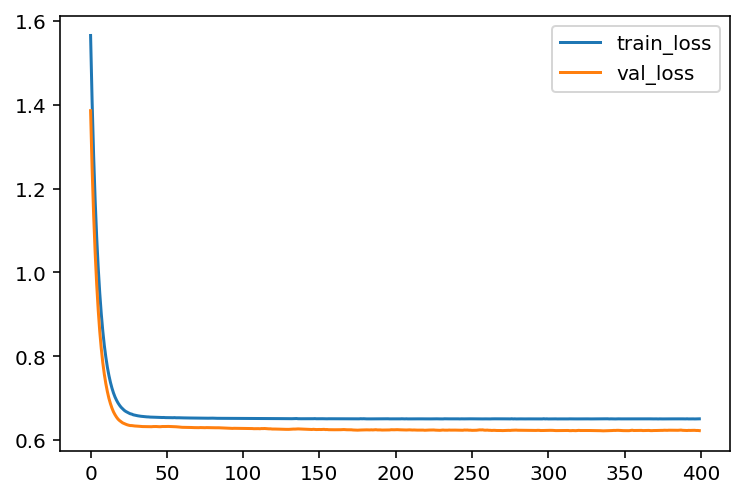

In [17]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

acc_train = hist.history['accuracy']
acc_val = hist.history['val_accuracy']

plt.plot(loss_train, label='train_loss')
plt.plot(loss_val, label='val_loss')
plt.legend()

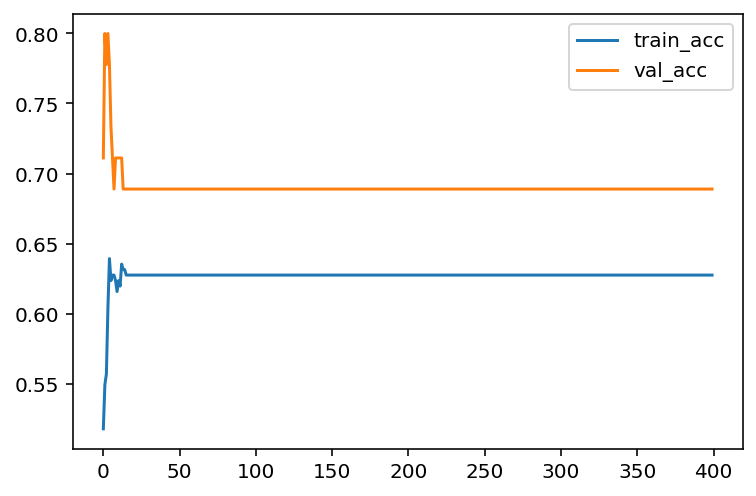

In [18]:
plt.plot(acc_train, label='train_acc')
plt.plot(acc_val, label='val_acc')
plt.legend()

In [19]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=2, n_repeated=2, n_classes=3, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

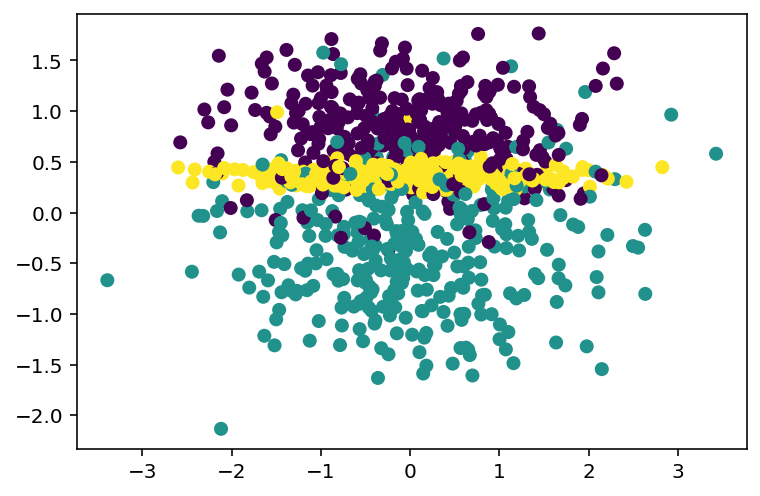

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8466666666666667

In [22]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8266666666666667

In [23]:
#| output: false
import keras_core as keras
from keras.utils import to_categorical
from keras import models, layers

vy_train = to_categorical(y_train, num_classes=3)
vy_test = to_categorical(y_test, num_classes=3)

model = models.Sequential()
model.add(layers.Dense(3, activation='softmax', input_dim=10))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, vy_train, epochs=50, batch_size=50, verbose=0)
_ = model.evaluate(X_test, vy_test)

1/5 [=====>........................] - ETA: 0s - loss: 0.5166 - accuracy: 0.8438

5/5 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.8067
